In [1]:
# Importing packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing data
data = pd.read_csv('survey.csv')

# print number of columns and records
print(data.shape)

# Move the "treatment" column to the last as it is easier for data processing and giving distinction between independent variables and dependent variable
data = data[[c for c in data if c not in ['treatment']] + ['treatment']]

# get sample data
data.head()

(1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,treatment
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Often,6-25,No,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,Yes
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,Rarely,More than 1000,No,...,Maybe,No,No,No,No,No,Don't know,No,NaN,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,Rarely,6-25,No,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Often,26-100,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,Never,100-500,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,No


In [3]:
# get data types of the columns
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
treatment                    object
dtype: object

In [4]:
# Convert Timestamp to timestamp datatype
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.dtypes['Timestamp']

dtype('<M8[ns]')

In [5]:
# Get description of all columns
data.describe(include='all')

<ipython-input-5-93196bf5eb7b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,treatment
count,1259,1.259000e+03,1259,1259,744,1241,1259,995,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,164,1259
unique,1246,NaN,49,48,45,2,2,4,6,2,...,3,3,3,3,3,3,3,2,160,2
top,2014-08-27 12:54:11,NaN,Male,United States,CA,No,No,Sometimes,6-25,No,...,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.,Yes
freq,2,NaN,615,751,138,1095,767,465,290,883,...,490,925,774,516,1008,557,576,1075,5,637
first,2014-08-27 11:29:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-02-01 23:04:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Get value counts of the categorical columns
catCols = [col for col in data.columns if data[col].dtype=="object"]
for col in catCols:
  print(col)
  print('Value counts:')
  print(data[col].value_counts())
  print('\n Number of null values:')
  print(data[col].isna().sum())
  print('\n')

Gender
Value counts:
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female (trans)                                      2
Cis Male                                            2
Man                                                 2
Female                                              2
woman                                               1
male leaning androgynous                            1
A little about you                                  1
Agender

In [7]:
# Cleaning columns

# Cleaning up Gender column
'''
remove "ostensibly male, unsure what that really means", "fluid", "All", "Nah", "something kinda male?", "Male-ish", "Androgyne", "Agender", "Enby",
"Guy (-ish) ^_^", "p", "A little about you", "Neuter"

rename:
male = Male; M = Male; female = Female; F = Female; m = Male; f = Female; Make = Male; Woman = Female; Cis Male = Male; Female (trans) = Trans; Man = Male;
cis male = Male; Mail = Male; Female (cis) = Female; queer = Non-binary; msle = Male; Malr = Male; femail = Female; Trans woman = Female; woman = Female;
male leaning androgynous = Male; cis-female/femme = Female; Genderqueer = Non-binary; Femake = Female; non-binary = Non-binary; queer/she/they = Non-binary;
Male (CIS) = Male; Mal = Male; Cis Female = Female; Trans-female = Trans; maile = Male; Cis Man = Male
'''

# Renaming gender values
data = data.replace(['male','M','m','Make','Male ','Cis Male','Man','cis male','Mail','msle','Malr','male leaning androgynous','Male (CIS)','Mal','maile','Cis Man'],'Male')
data = data.replace(['female','F','f','Woman','Female (trans)','Female ','cis-female/femme','Female (cis)','woman','Femake','Cis Female','femail'],'Female')
data = data.replace(['Trans-female','Trans woman'],'Trans')
data = data.replace(['queer/she/they','non-binary','Genderqueer','queer'],'Non-binary')

# Drop rows from gender_remove list
gender_remove = ["ostensibly male, unsure what that really means", "fluid", "All", "Nah", "something kinda male?", "Male-ish", "Androgyne", "Agender", "Enby",
"Guy (-ish) ^_^", "p", "A little about you", "Neuter","Non-binary", "Trans"]
data = data[data['Gender'].isin(gender_remove) == False]
print('Gender:')
print(data['Gender'].value_counts())

# Remove rows where self_employed is null
data = data[~data['self_employed'].isnull()]

# Drop rows from age_remove list (remove age with greater than 100 and less than 0)
print('\nBefore removing rows: ', data.shape[0])
age_remove = [329,-29,-1726]
data = data[data['Age'].isin(age_remove) == False]
print('After removing rows: ', data.shape[0])

# Categorize the Age column into bins
bins = [0, 10, 18, 35, 65, np.inf]
names = ['<10', '10-18', '18-35', '35-65', '65+']
data['AgeRange'] = pd.cut(data['Age'], bins, labels=names)
print('\nAgeRange:')
print(data['AgeRange'].value_counts())

# Remove columns: State; work_interfere; comments; Age; Timestamp
print('\nBefore removing columns: ', data.shape[1])
data = data.drop(['Timestamp','state','work_interfere','comments','Age'], axis=1)
print('After removing columns: ', data.shape[1])

Gender:
Male      991
Female    249
Name: Gender, dtype: int64

Before removing rows:  1222
After removing rows:  1219

AgeRange:
18-35    886
35-65    324
10-18      7
<10        1
65+        1
Name: AgeRange, dtype: int64

Before removing columns:  28
After removing columns:  23


In [8]:
# Label encode to convert categorical columns into numerical ones
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_le = data.apply(label_encoder.fit_transform)

for col, col_le in zip(data.columns, data_le.columns):
  print(col)
  print('String format:')
  print(data[col].unique())
  print('Numerical format:')
  print(data_le[col_le].unique())
  print('\n')

Gender
String format:
['Male' 'Female']
Numerical format:
[1 0]


Country
String format:
['United States' 'France' 'United Kingdom' 'Canada' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Mexico'
 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Russia' 'Italy' 'Bulgaria' 'Sweden' 'Colombia' 'Latvia'
 'Romania' 'Belgium' 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']
Numerical format:
[44 14 43  6 33 27 41 32  0 16 25  4 37  9  1 20 19 38 35 22  5 40  8 24
 34  2 28 39 13 45 21  3 18 36 23 29 10 30 42 12 17 26 15  7 11 31]


self_employed
String format:
['Yes' 'No']
Numerical format:
[1 0]


family_history
String format:
['Yes' 'No']
Numerical format:
[1 0]


no_employees
String format:
['1-5' '6-25' '100-500' '26-100' 'More than 1000' '500-1000']
Numeric

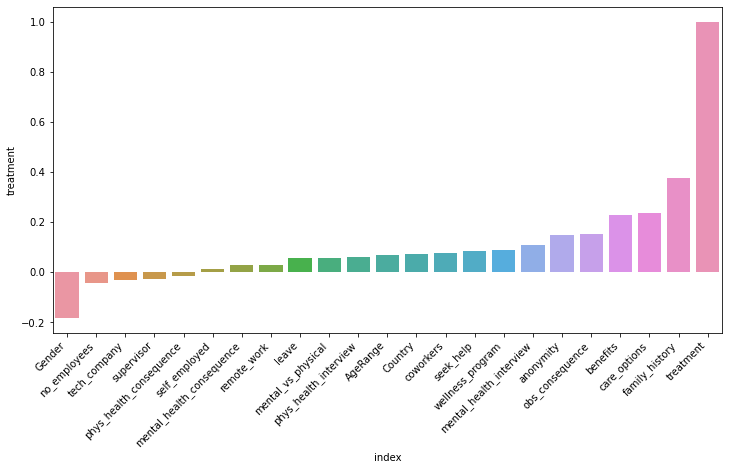

In [9]:
#correlation bar plot comparing correlation between other columns
data_corr = pd.DataFrame(data_le.corr()['treatment']).reset_index().sort_values(by='treatment')
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='index', y='treatment', data = data_corr, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [10]:
##finding columns that have relatively strong positive or negative correlation with the treatment column. 
data_corr = data_corr[(data_corr['treatment']<-0.1) | (data_corr['treatment']>0.1)]
data_corr

,index,treatment
0,Gender,-0.184110
17,mental_health_interview,0.106505
11,anonymity,0.146585
20,obs_consequence,0.151016
7,benefits,0.229718
8,care_options,0.237043
3,family_history,0.376587
21,treatment,1.000000


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, auc, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

Accuracy of logistic regression classifier on train set: 0.73
Accuracy of logistic regression classifier on test set: 0.68
Precision of logistic regression classifier on test set: 0.70


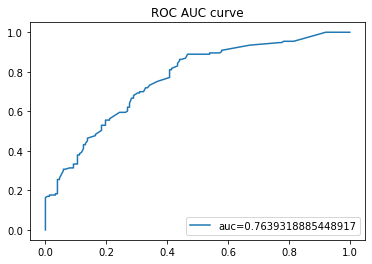

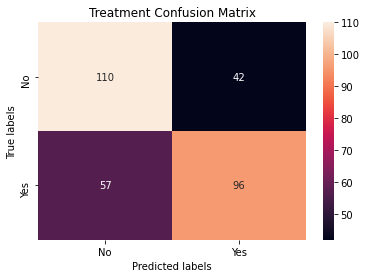

In [12]:
# Segregate data: X = all correlated independent columns; y = dependent column

X = data_le[data_corr['index']]
X = X.drop('treatment', axis=1)
y = data_le['treatment']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression with all default values
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(lr.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

# ROC AUC curve
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title('ROC AUC curve')
plt.legend(loc=4)
plt.show()

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Treatment Confusion Matrix')

# 0 = No, 1 = Yes
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes']);

Best: 0.724284 using {'C': 1, 'solver': 'newton-cg'}
Accuracy of logistic regression classifier on train set: 0.73
Accuracy of logistic regression classifier on test set: 0.68
Precision of logistic regression classifier on test set: 0.70


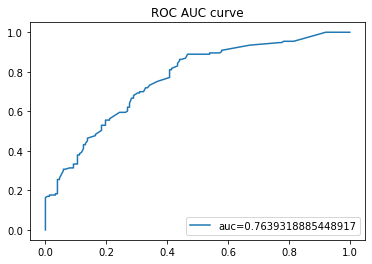

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

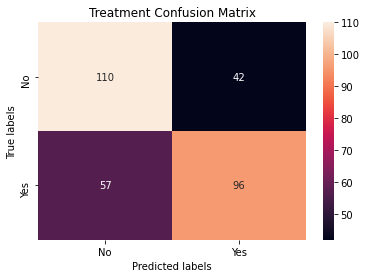

In [13]:
# Logistic Regression with hyperparameters using GridSearchCV
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
lr_gridcv = GridSearchCV(lr, param_grid = param_grid, refit = True, scoring = 'accuracy', cv = 5, error_score=0)

# fitting the model for grid search
lr_gridcv.fit(X_train , y_train)
print("Best: %f using %s" % (lr_gridcv.best_score_, lr_gridcv.best_params_))

# Logistic Regression with best values got from GridSearchCV
lr_grid = LogisticRegression(C = lr_gridcv.best_params_['C'], solver = lr_gridcv.best_params_['solver'])
lr_grid.fit(X_train, y_train)
y_pred = lr_grid.predict(X_test)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(lr_grid.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_grid.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

# ROC AUC curve
y_pred_proba = lr_grid.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title('ROC AUC curve')
plt.legend(loc=4)
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Treatment Confusion Matrix')

# 0 = No, 1 = Yes
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

Best: 0.719912 using {'C': 0.1, 'solver': 'liblinear'}
Accuracy of logistic regression classifier on train set: 0.72
Accuracy of logistic regression classifier on test set: 0.69
Precision of logistic regression classifier on test set: 0.71


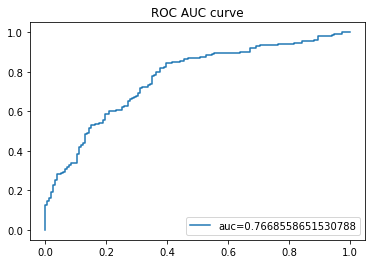

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

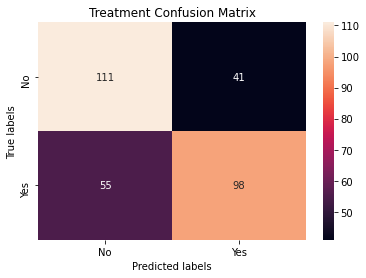

In [14]:
# Logistic regression with all independent columns and hyperparameter tuning
X = data_le.drop('treatment', axis=1)
y = data_le['treatment']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression with hyperparameters using GridSearchCV
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
lr_gridcv = GridSearchCV(lr, param_grid = param_grid, refit = True, scoring = 'accuracy', cv = 5, error_score=0)

# fitting the model for grid search
lr_gridcv.fit(X_train , y_train)
print("Best: %f using %s" % (lr_gridcv.best_score_, lr_gridcv.best_params_))

# Logistic Regression with best values got from GridSearchCV
lr_grid = LogisticRegression(C = lr_gridcv.best_params_['C'], solver = lr_gridcv.best_params_['solver'])
lr_grid.fit(X_train, y_train)
y_pred = lr_grid.predict(X_test)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(lr_grid.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_grid.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

# ROC AUC curve
y_pred_proba = lr_grid.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title('ROC AUC curve')
plt.legend(loc=4)
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Treatment Confusion Matrix')

# 0 = No, 1 = Yes
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# RandomForestClassifier

Accuracy of RandomForestClassifier classifier on train set: 0.76
Accuracy of RandomForestClassifier on test set: 0.67
Precision of RandomForestClassifier on test set: 0.70


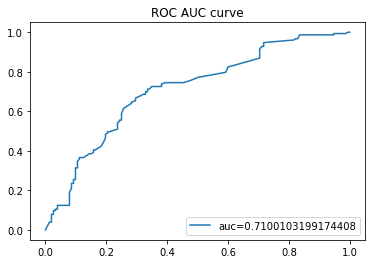

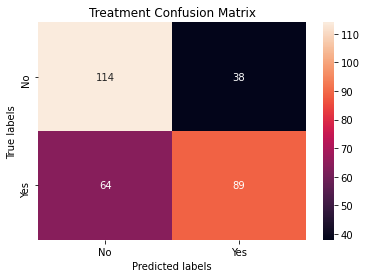

In [16]:
# Segregate data: X = all correlated independent columns; y = dependent column

X = data_le[data_corr['index']]
X = X.drop('treatment', axis=1)
y = data_le['treatment']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# RandomForestClassifier with all default values
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy of RandomForestClassifier classifier on train set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of RandomForestClassifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
print('Precision of RandomForestClassifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

# ROC AUC curve
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title('ROC AUC curve')
plt.legend(loc=4)
plt.show()

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Treatment Confusion Matrix')

# 0 = No, 1 = Yes
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes']);

# XGBClassifier

Accuracy of xg classifier on train set: 0.76
Accuracy of xg Classifier on test set: 0.67
Precision of xg Classifier on test set: 0.71


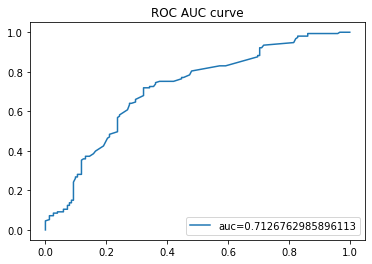

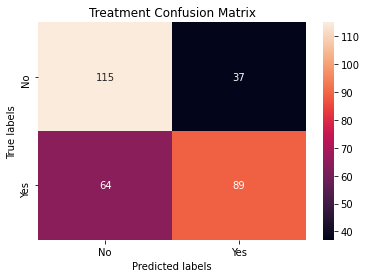

In [17]:
# Segregate data: X = all correlated independent columns; y = dependent column

X = data_le[data_corr['index']]
X = X.drop('treatment', axis=1)
y = data_le['treatment']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBClassifier with all default values
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

print('Accuracy of xg classifier on train set: {:.2f}'.format(xg.score(X_train, y_train)))
print('Accuracy of xg Classifier on test set: {:.2f}'.format(xg.score(X_test, y_test)))
print('Precision of xg Classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

# ROC AUC curve
y_pred_proba = xg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title('ROC AUC curve')
plt.legend(loc=4)
plt.show()

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Treatment Confusion Matrix')

# 0 = No, 1 = Yes
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes']);

# DecisionTreeClassifier

Accuracy of Decision tree  classifier on train set: 0.76
Accuracy of Decision tree  Classifier on test set: 0.65
Precision of Decision tree  Classifier on test set: 0.70


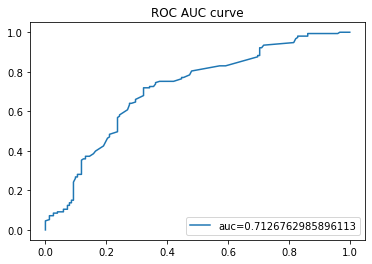

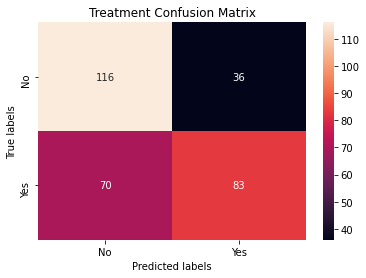

In [18]:
X = data_le[data_corr['index']]
X = X.drop('treatment', axis=1)
y = data_le['treatment']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision tree Classifier with all default values
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)

print('Accuracy of Decision tree  classifier on train set: {:.2f}'.format(dc.score(X_train, y_train)))
print('Accuracy of Decision tree  Classifier on test set: {:.2f}'.format(dc.score(X_test, y_test)))
print('Precision of Decision tree  Classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

# ROC AUC curve
y_pred_proba = xg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title('ROC AUC curve')
plt.legend(loc=4)
plt.show()

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Treatment Confusion Matrix')

# 0 = No, 1 = Yes
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes']);